In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./통합데이터_추가수정(사업체수 추가).csv',encoding='cp949')
df.head()

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,31,NaN,NaN,NaN,0,0,2535118
2,강서구청,35.211247,128.981756,4251,NaN,2076,1.22,26,4630,109,4,NaN,NaN,NaN,0,0,2029127
3,개금역,35.153284,129.020533,13621,37.0,27187,0.94,79,2501,36,65,NaN,NaN,NaN,0,1,4717075
4,거제(법원·검찰청),35.188589,129.073941,9546,16.0,27403,0.91,14,3093,114,13,NaN,NaN,NaN,0,1,3099526


In [152]:
df.columns

Index(['역사명', '역위도', '역경도', '일평균승하차(명)', '상가 면적', '거주자수', '남여비율', '1인 가구수 레벨',
       '1인 가구수(세대)', '사업체수', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역', '여객 터미널',
       '주변 관광지', '주변 대학교', '일평균(원)'],
      dtype='object')

In [4]:
use_df = df[['역사명','일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','일평균(원)']]
use_df.head()

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,일평균(원)
0,가야역,5799,0.95,6291,49,1926082
1,감전역,6107,1.12,5461,57,2535118
2,강서구청,4251,1.22,4630,109,2029127
3,개금역,13621,0.94,2501,36,4717075
4,거제(법원·검찰청),9546,0.91,3093,114,3099526


In [159]:
# 변수 4
clustering_data = use_df[['일평균승하차(명)', '사업체수', '1인 가구수(세대)','일평균(원)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [155]:
# 변수 2개
clustering_data = use_df[['일평균승하차(명)','1인 가구수(세대)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [110]:
# 변수 3개
clustering_data = use_df[['일평균승하차(명)','1인 가구수(세대)','일평균(원)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [160]:
clustering_data.shape

(100, 4)

In [161]:
minmax_scaler.transform([[2,2,2,2]])

array([[-0.00598469,  0.00410678, -0.05325914, -0.00220548]])

In [162]:
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)', '사업체수', '1인 가구수(세대)','일평균(원)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),사업체수,1인 가구수(세대),일평균(원)
가야역,0.094868,0.100616,0.779942,0.046801
감전역,0.100226,0.117043,0.669979,0.062298
강서구청,0.067937,0.223819,0.559883,0.049423
개금역,0.230950,0.073922,0.277822,0.117815
거제(법원·검찰청),0.160056,0.234086,0.356253,0.076658


In [39]:
# 변수 2개
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)','1인 가구수(세대)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),1인 가구수(세대)
가야역,0.094868,0.779942
감전역,0.100226,0.669979
강서구청,0.067937,0.559883
개금역,0.230950,0.277822
거제(법원·검찰청),0.160056,0.356253


In [113]:
# 3개
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)','1인 가구수(세대)','일평균(원)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),1인 가구수(세대),일평균(원)
가야역,0.094868,0.779942,0.046801
감전역,0.100226,0.669979,0.062298
강서구청,0.067937,0.559883,0.049423
개금역,0.230950,0.277822,0.117815
거제(법원·검찰청),0.160056,0.356253,0.076658


In [163]:
scaling_data.corr()

,일평균승하차(명),사업체수,1인 가구수(세대),일평균(원)
일평균승하차(명),1.000000,0.355560,0.033473,0.919696
사업체수,0.355560,1.000000,-0.011647,0.420679
1인 가구수(세대),0.033473,-0.011647,1.000000,0.036853
일평균(원),0.919696,0.420679,0.036853,1.000000


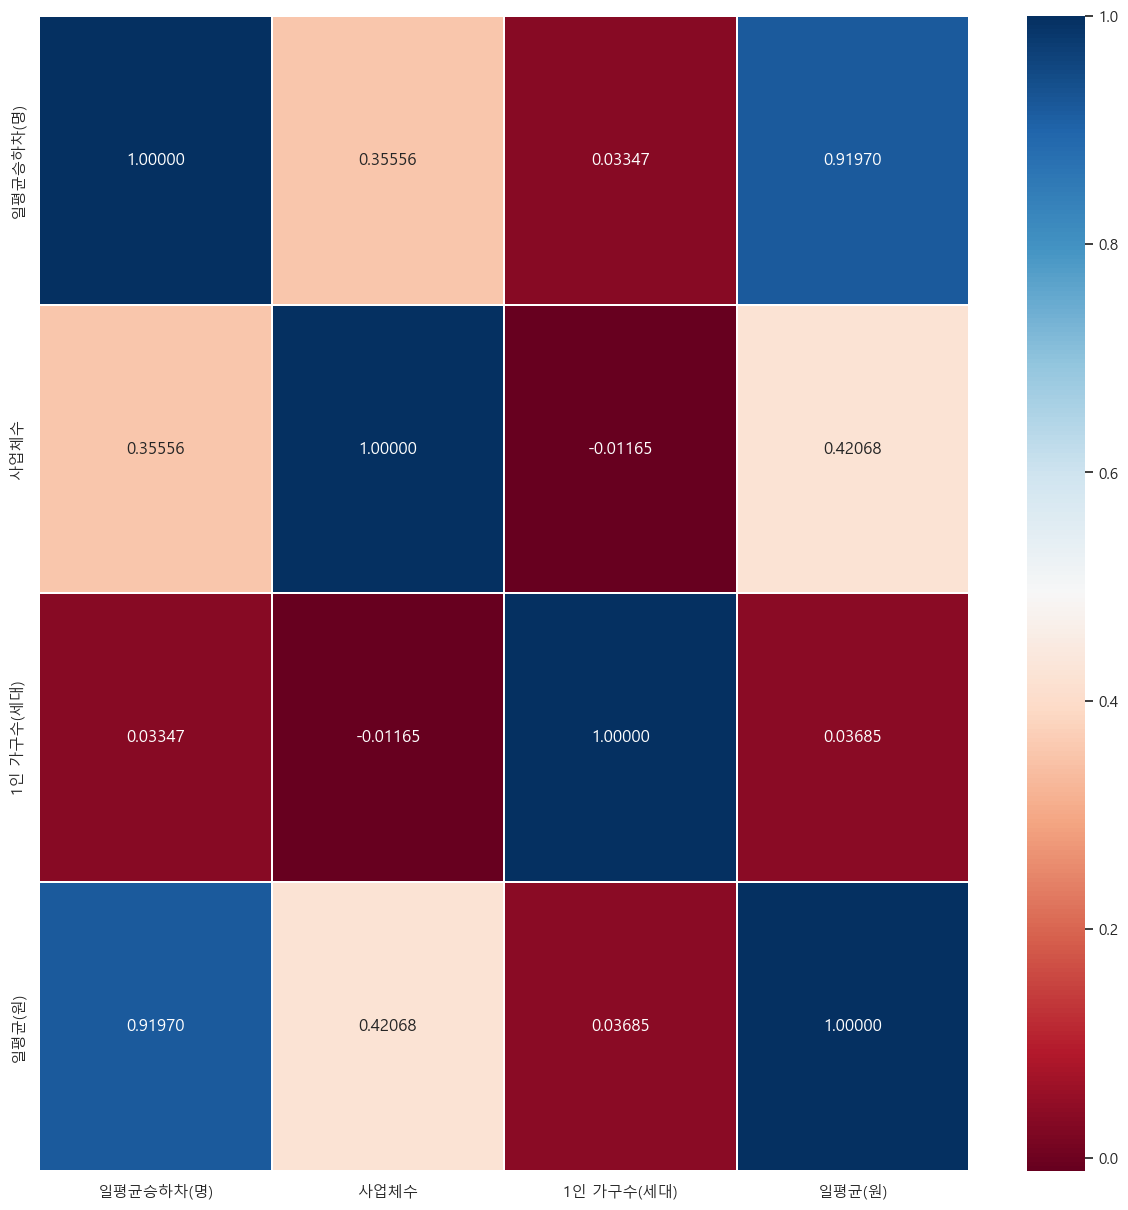

In [164]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(scaling_data.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

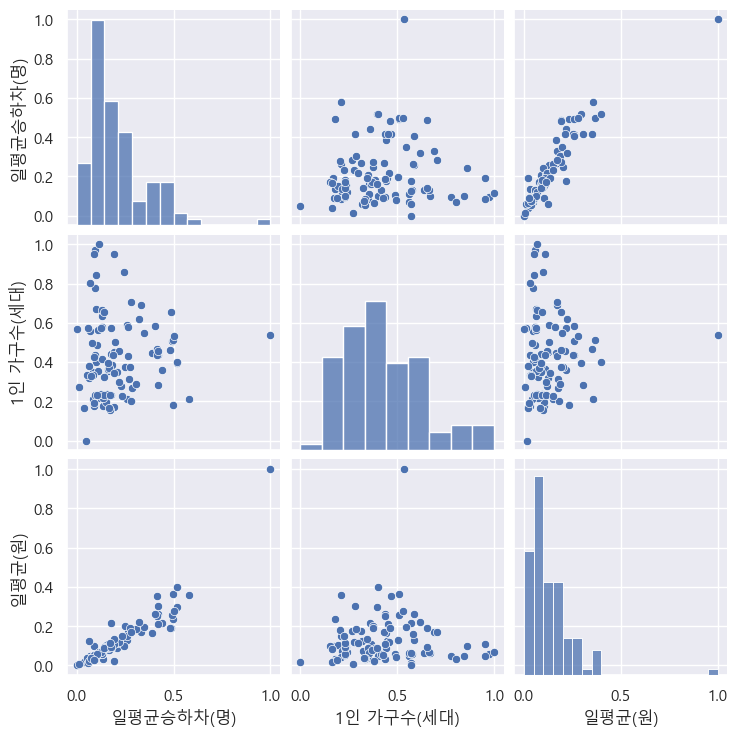

In [116]:
sns.pairplot(scaling_data)
plt.show()

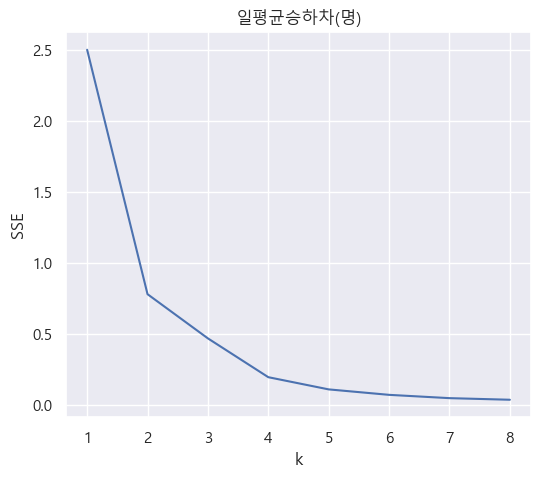

In [165]:
# 일평균승하차(명)
df_oneman = pd.DataFrame(scaling_data['일평균승하차(명)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('일평균승하차(명)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

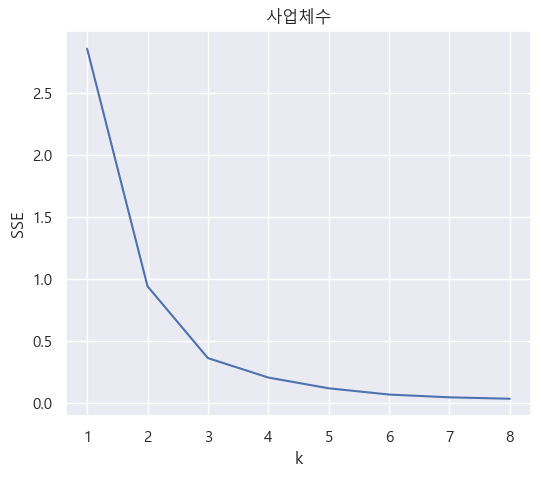

In [166]:
# 사업체수
df_oneman = pd.DataFrame(scaling_data['사업체수'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('사업체수')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

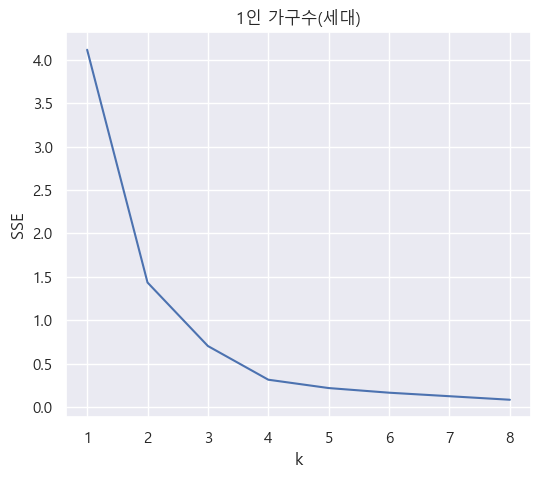

In [167]:
# 1인 가구수(세대)
df_oneman = pd.DataFrame(scaling_data['1인 가구수(세대)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('1인 가구수(세대)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [119]:
scaling_data

,일평균승하차(명),1인 가구수(세대),일평균(원)
가야역,0.094868,0.779942,0.046801
감전역,0.100226,0.669979,0.062298
강서구청,0.067937,0.559883,0.049423
개금역,0.230950,0.277822,0.117815
거제(법원·검찰청),0.160056,0.356253,0.076658
...,...,...,...
충렬사(안락),0.087891,0.191706,0.026219
토성,0.234864,0.226020,0.150515
하단,0.499896,0.531267,0.277933
해운대역,0.320946,0.618839,0.222429


In [243]:
# 적절한 군집수 3을 가지고 군집 예측값 생성

cluster_model = KMeans(n_clusters=2,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(scaling_data)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(scaling_data)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2        3
0  0.165490  0.096216  0.296131  0.09558
1  0.280228  0.199132  0.596486  0.17299
[1 1 1 0 0 1 0 1 1 0]


In [244]:
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = scaling_data.copy()
cluster_df['clust'] = pred
cluster_df

,일평균승하차(명),사업체수,1인 가구수(세대),일평균(원),clust
가야역,0.094868,0.100616,0.779942,0.046801,1
감전역,0.100226,0.117043,0.669979,0.062298,1
강서구청,0.067937,0.223819,0.559883,0.049423,1
개금역,0.230950,0.073922,0.277822,0.117815,0
거제(법원·검찰청),0.160056,0.234086,0.356253,0.076658,0
...,...,...,...,...,...
충렬사(안락),0.087891,0.071869,0.191706,0.026219,0
토성,0.234864,0.014374,0.226020,0.150515,0
하단,0.499896,0.073922,0.531267,0.277933,1
해운대역,0.320946,0.164271,0.618839,0.222429,1


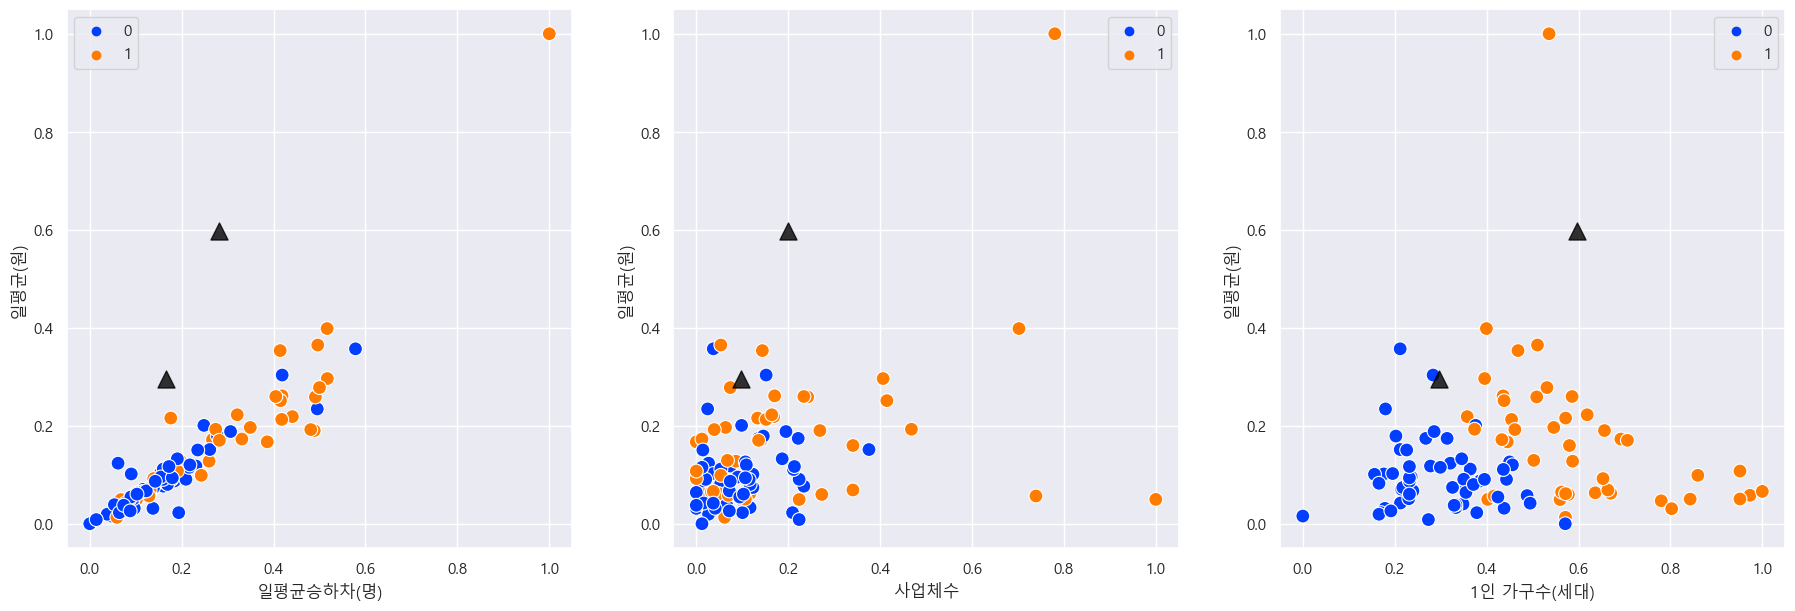

In [245]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)  
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

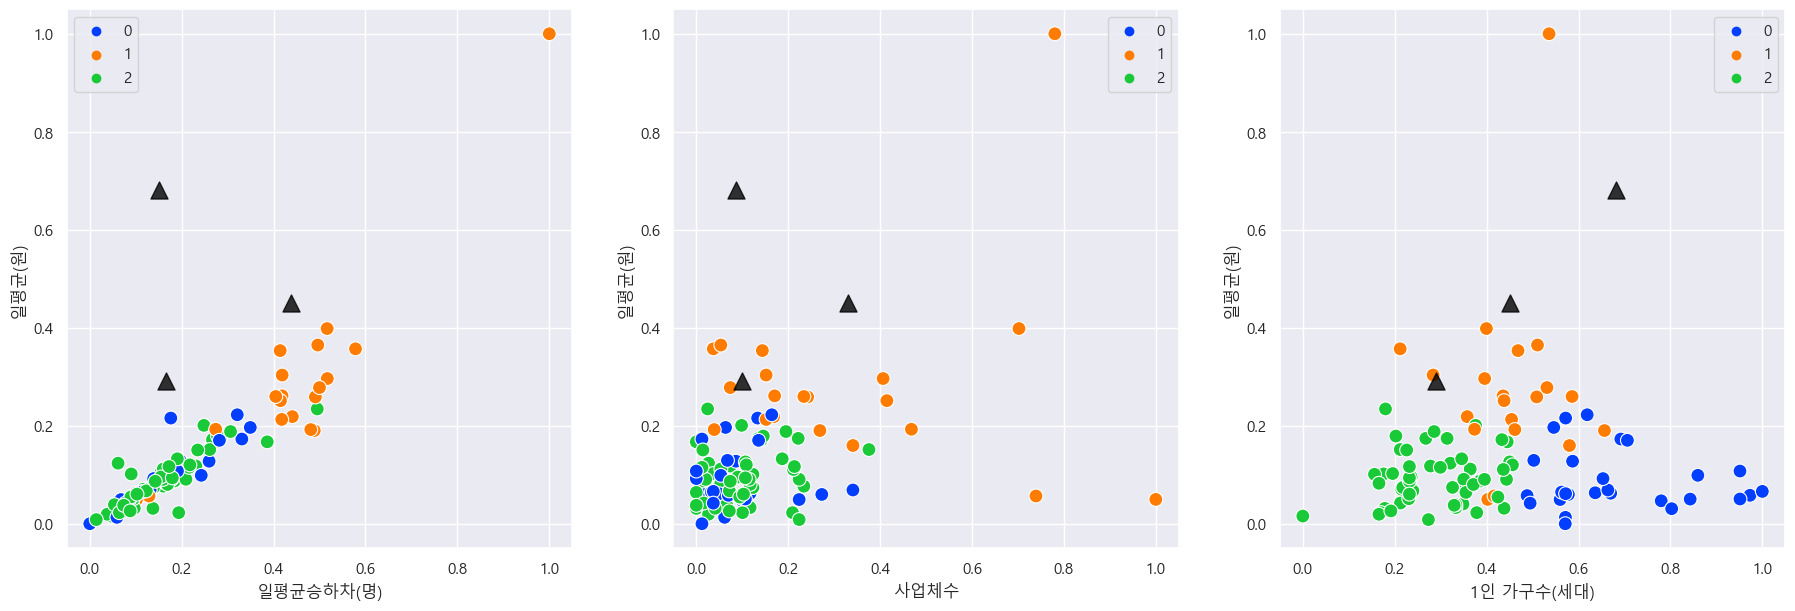

In [172]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)  
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

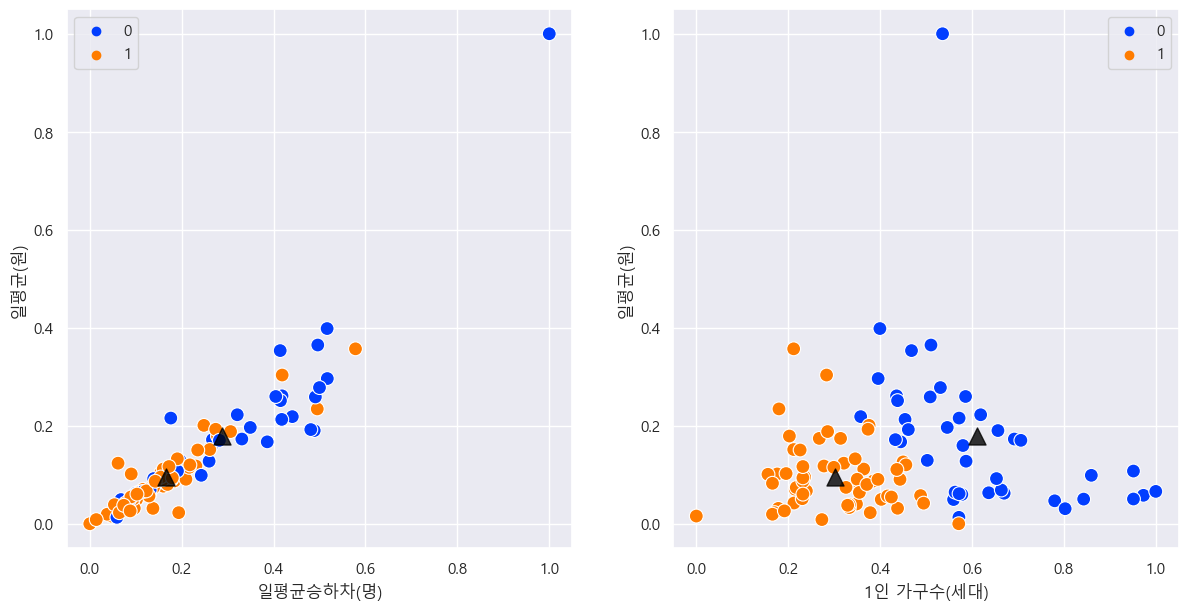

In [122]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)    
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.show()

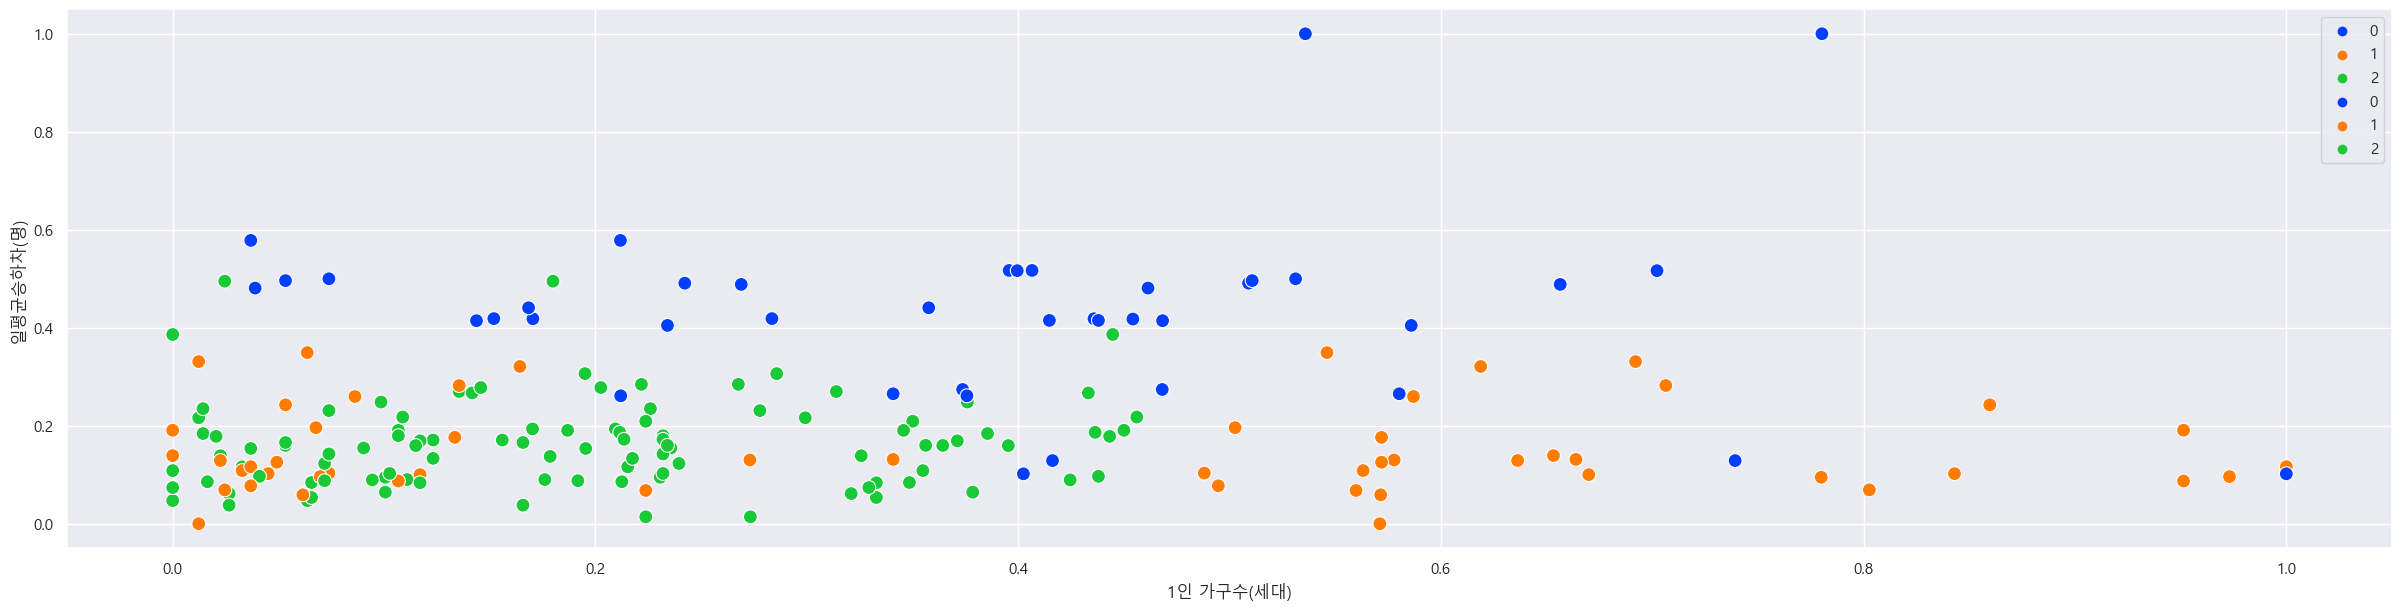

In [90]:
plt.figure(figsize=(30,7))
X= cluster_df

sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.show()

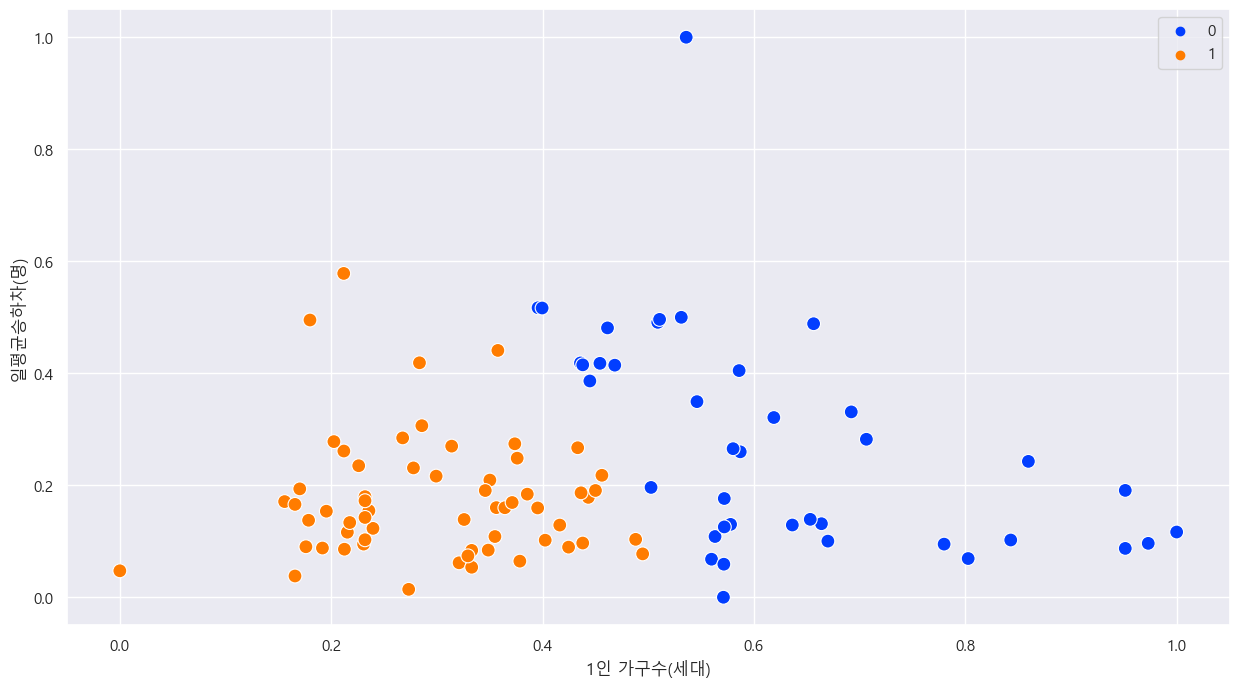

In [56]:
plt.figure(figsize=(15,8))
X= cluster_df
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')
plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3

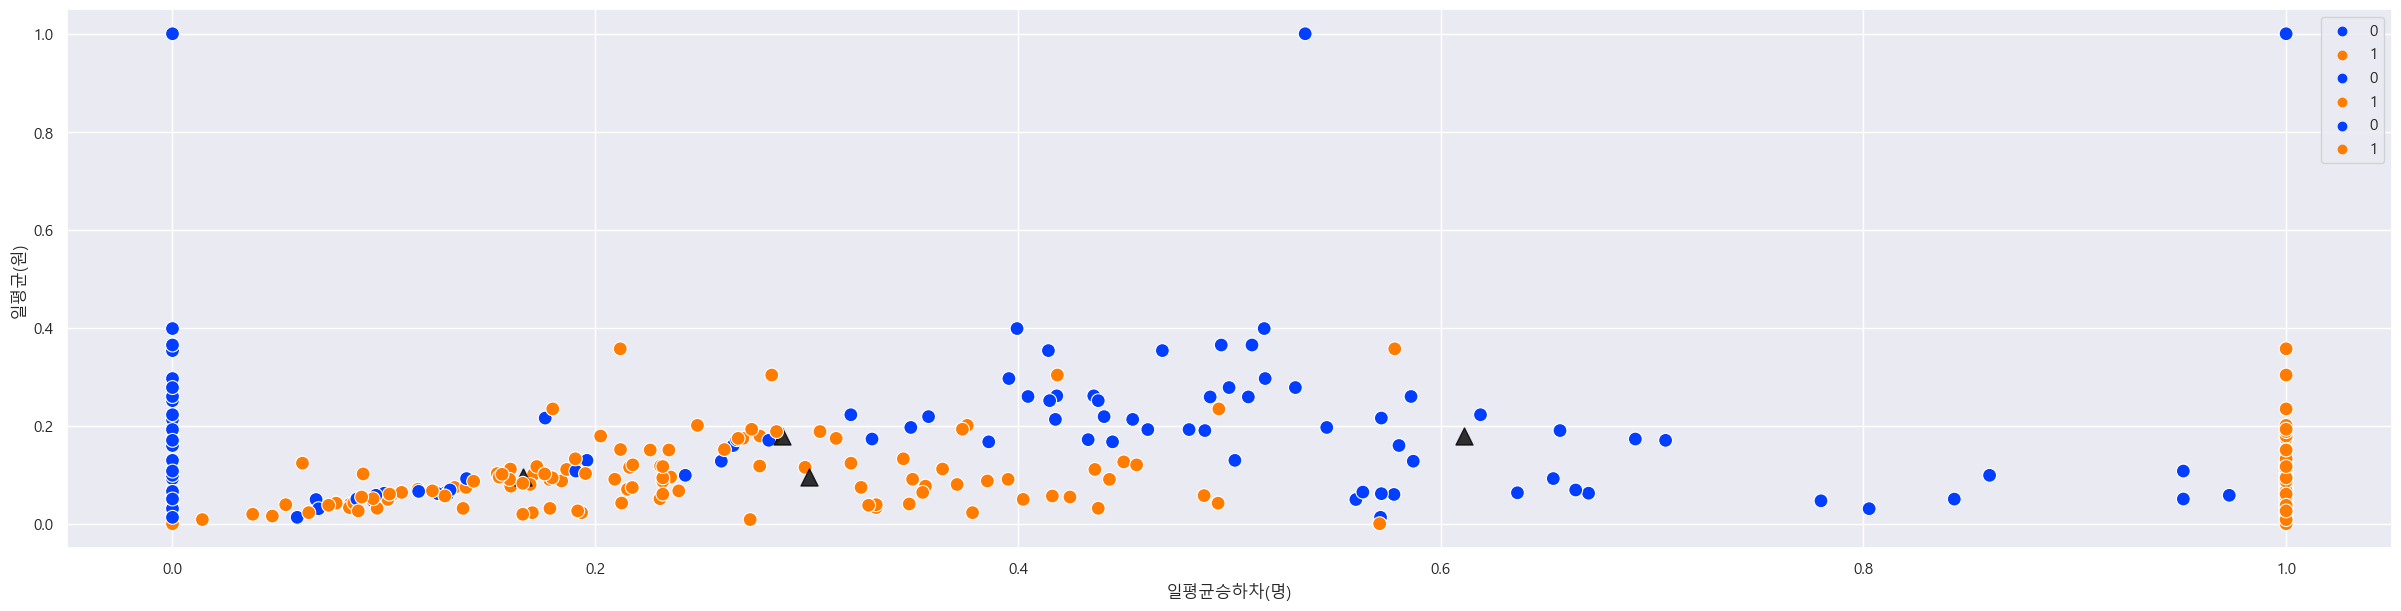

In [149]:
plt.figure(figsize=(30,7))
X= cluster_df

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')


#sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,3], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

## 정규화 안하고 해보기

In [5]:
use_df = df[['역사명','일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','거주자수','일평균(원)']]
use_df.head()

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
0,가야역,5799,0.95,6291,49,25217,1926082
1,감전역,6107,1.12,5461,57,12825,2535118
2,강서구청,4251,1.22,4630,109,2076,2029127
3,개금역,13621,0.94,2501,36,27187,4717075
4,거제(법원·검찰청),9546,0.91,3093,114,27403,3099526


In [6]:
use_df = use_df.set_index(use_df["역사명"])

In [7]:
use_df.drop(columns="역사명", inplace=True)

In [45]:
use_df

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
역사명,,,,,,
가야역,5799,0.95,6291,49,25217,1926082
감전역,6107,1.12,5461,57,12825,2535118
강서구청,4251,1.22,4630,109,2076,2029127
개금역,13621,0.94,2501,36,27187,4717075
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526
...,...,...,...,...,...,...
충렬사(안락),5398,0.94,1851,35,18134,1117126
토성,13846,0.94,2110,7,28882,6002230
하단,29080,1.00,4414,36,21407,11010043


In [91]:
# 서면 물리적 제거
not_outline = use_df.drop(("서면역"), axis=0)
not_outline

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
역사명,,,,,,
가야역,5799,0.95,6291,49,25217,1926082
감전역,6107,1.12,5461,57,12825,2535118
강서구청,4251,1.22,4630,109,2076,2029127
개금역,13621,0.94,2501,36,27187,4717075
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526
...,...,...,...,...,...,...
충렬사(안락),5398,0.94,1851,35,18134,1117126
토성,13846,0.94,2110,7,28882,6002230
하단,29080,1.00,4414,36,21407,11010043


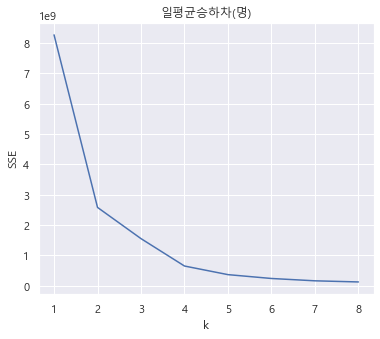

In [9]:
# 일평균승하차(명)
df_oneman = pd.DataFrame(use_df['일평균승하차(명)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('일평균승하차(명)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

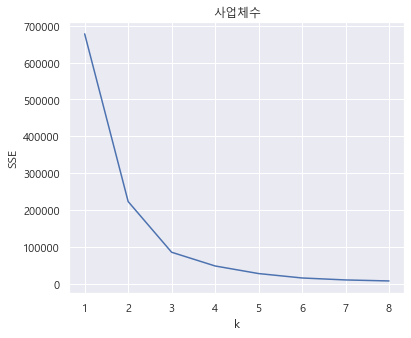

In [10]:
# 사업체수
df_oneman = pd.DataFrame(use_df['사업체수'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('사업체수')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

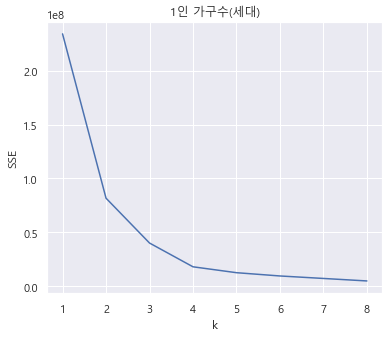

In [11]:
# 1인 가구수(세대)
df_oneman = pd.DataFrame(use_df['1인 가구수(세대)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('1인 가구수(세대)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [8]:
# 군집 4 서면 O
# 적절한 군집수 3을 가지고 군집 예측값 생성

cluster_model = KMeans(n_clusters=4,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(use_df)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(use_df)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

              0         1            2           3             4             5
0   7457.629032  0.975645  3612.532258   54.709677  20208.935484  2.626811e+06
1  27361.636364  0.944545  3677.000000  116.454545  25302.909091  1.217035e+07
2  57826.000000  0.940000  4449.000000  380.000000  40014.000000  3.938885e+07
3  17494.076923  1.068846  3646.076923   70.692308  22169.038462  7.002269e+06
[0 0 0 0 0 1 3 3 3 0]


In [92]:
# 군집 3 서면 X

cluster_model = KMeans(n_clusters=3,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(not_outline)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(not_outline)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

              0         1            2           3             4             5
0   7457.629032  0.975645  3612.532258   54.709677  20208.935484  2.626811e+06
1  27361.636364  0.944545  3677.000000  116.454545  25302.909091  1.217035e+07
2  17494.076923  1.068846  3646.076923   70.692308  22169.038462  7.002269e+06
[0 0 0 0 0 1 2 2 2 0]


In [9]:
# 군집 4 서면 O
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = use_df.copy()
cluster_df['kmeans_group'] = pred
cluster_df

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),kmeans_group
역사명,,,,,,,
가야역,5799,0.95,6291,49,25217,1926082,0
감전역,6107,1.12,5461,57,12825,2535118,0
강서구청,4251,1.22,4630,109,2076,2029127,0
개금역,13621,0.94,2501,36,27187,4717075,0
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526,0
...,...,...,...,...,...,...,...
충렬사(안락),5398,0.94,1851,35,18134,1117126,0
토성,13846,0.94,2110,7,28882,6002230,3
하단,29080,1.00,4414,36,21407,11010043,1


In [93]:
# 군집 3 서면 X
cluster_df = not_outline.copy()
cluster_df['kmeans_group'] = pred
cluster_df

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),kmeans_group
역사명,,,,,,,
가야역,5799,0.95,6291,49,25217,1926082,0
감전역,6107,1.12,5461,57,12825,2535118,0
강서구청,4251,1.22,4630,109,2076,2029127,0
개금역,13621,0.94,2501,36,27187,4717075,0
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526,0
...,...,...,...,...,...,...,...
충렬사(안락),5398,0.94,1851,35,18134,1117126,0
토성,13846,0.94,2110,7,28882,6002230,2
하단,29080,1.00,4414,36,21407,11010043,1


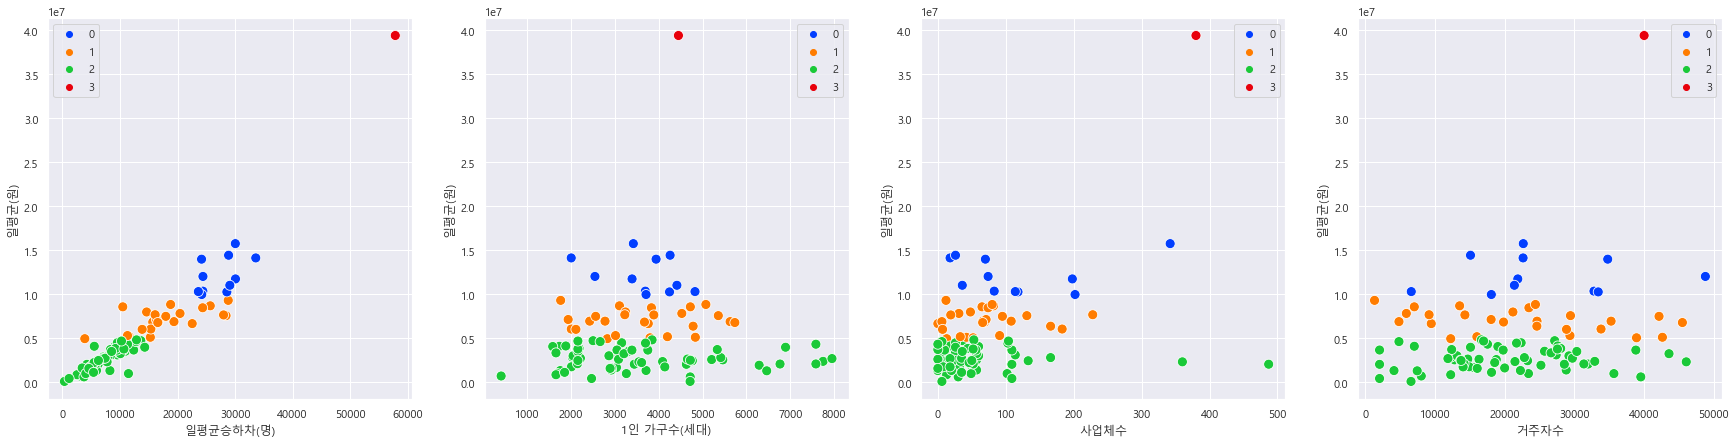

In [81]:
# Kmeans 군집 4
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)  
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(144)  
sns.scatterplot(x=X.iloc[:,4], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

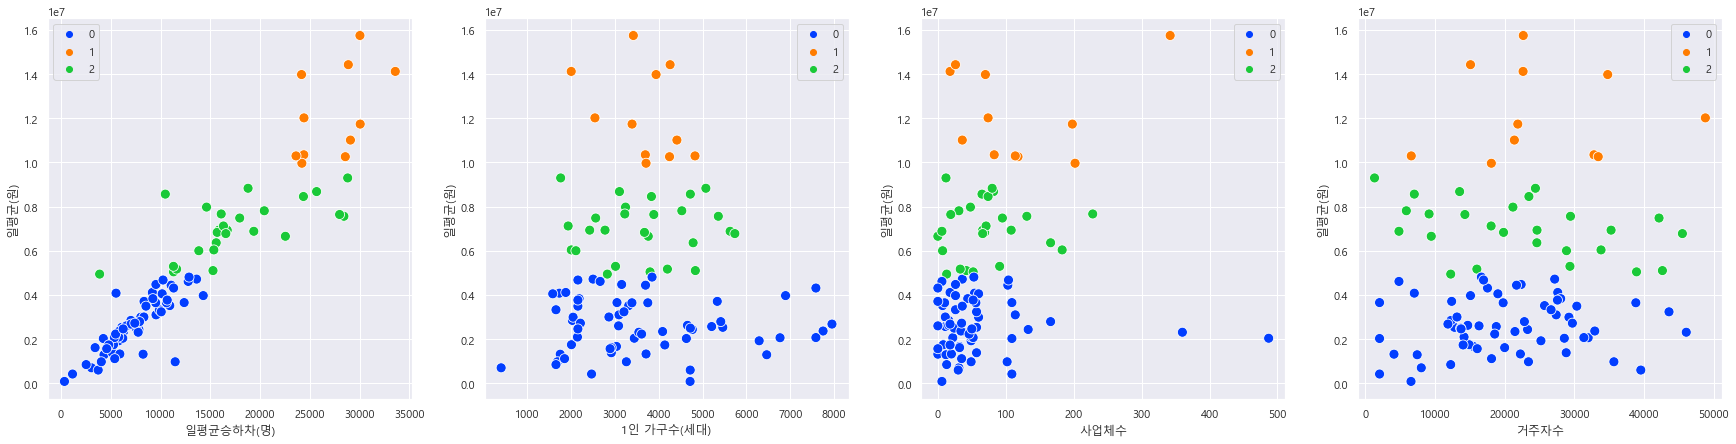

In [66]:
# kmeans 군집 3
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,5], data=not_outline, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,5], data=not_outline, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)  
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,5], data=not_outline, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(144)  
sns.scatterplot(x=X.iloc[:,4], y=X.iloc[:,5], data=not_outline, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

In [11]:
# kmeans 군집 4 서면 O
temp = cluster_df.groupby(['kmeans_group']).mean()

In [1]:
# 군집 3 서면 X
cluster_df.groupby(['kmeans_group']).mean()

NameError: name 'cluster_df' is not defined

In [14]:
group_0 = cluster_df[cluster_df['kmeans_group']==0]
group_1 =cluster_df[cluster_df['kmeans_group']==1]
group_2 = cluster_df[cluster_df['kmeans_group']==2]
group_3 = cluster_df[cluster_df['kmeans_group']==3]

In [15]:
group_0

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),kmeans_group
역사명,,,,,,,
가야역,5799,0.95,6291,49,25217,1926082,0
감전역,6107,1.12,5461,57,12825,2535118,0
강서구청,4251,1.22,4630,109,2076,2029127,0
개금역,13621,0.94,2501,36,27187,4717075,0
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526,0
...,...,...,...,...,...,...,...
주례역,10672,1.00,2155,52,27588,3768794,0
지게골역,4593,0.94,2890,0,16085,1567851,0
체육공원,1158,1.22,2467,109,2076,421284,0


In [16]:
group_0.to_excel("kmeans_group_0.xlsx")
group_1.to_excel("kmeans_group_1.xlsx")
group_2.to_excel("kmeans_group_2.xlsx")
group_3.to_excel("kmeans_group_3.xlsx")

In [68]:
cluster_df.to_csv("서면없이not_minmax_kmeans.csv",encoding='cp949')

In [100]:
cluster_df.to_csv("not_minmax_kmeans.csv",encoding='cp949')

In [ ]:
cluster_df.to_csv('../data/클러스터링_minmax.csv',encoding='cp949')